In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.tree import plot_tree

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("data/iris.csv")
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
df.describe(include="all")

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
# Bitno je da proverimo da li imamo neke nepostojace vrednosti
df.isna().any().any()

False

In [10]:
features = df.columns.tolist()[0:-1] # Izdvajamo imena svih karakteristika koje se koriste za klasifikaciju
x = df[features]
y = df['Species']

In [11]:
# Particionisanje skupa podataka
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y)

In [12]:
# Treniranje modela
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
dt.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
dt.feature_importances_
pd.Series(dt.feature_importances_, index=features)

Sepal_Length    0.040476
Sepal_Width     0.000000
Petal_Length    0.065994
Petal_Width     0.893530
dtype: float64

In [15]:
# Sa kojom verovatnocom je izvrsio klasifikaciju nad trening skupom
dt.predict_proba(x_train)[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

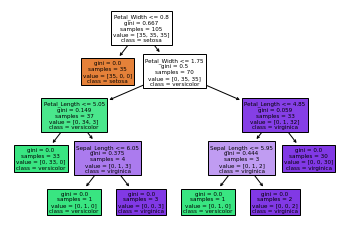

In [16]:
# Prikaz stabla
t = plot_tree(dt, feature_names=features, class_names=dt.classes_, filled=True)

In [17]:
# Predikcija nad trening skupom
y_pred = dt.predict(x_train)

In [18]:
def calculate_metrics(data, true_values, clf):
    y_pred = clf.predict(data)
    print("Accuracy: " + str(accuracy_score(true_values, y_pred)))
    print()
    print("Confusion matrix:")
    print(pd.DataFrame(confusion_matrix(true_values, y_pred), index=clf.classes_, columns=clf.classes_))
    print()
    print("Report:")
    print(classification_report(true_values, y_pred))

In [19]:
calculate_metrics(x_train, y_train, dt)

Accuracy: 1.0

Confusion matrix:
            setosa  versicolor  virginica
setosa          35           0          0
versicolor       0          35          0
virginica        0           0         35

Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       1.00      1.00      1.00        35
   virginica       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [20]:
calculate_metrics(x_test, y_test, dt)

Accuracy: 0.9555555555555556

Confusion matrix:
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          15          0
virginica        0           2         13

Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



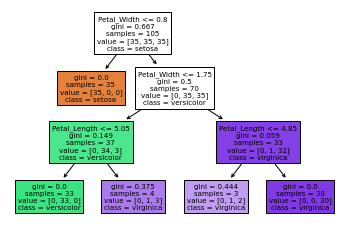

In [21]:
# Stablo odlucivanja sa ogranicenjima
dt1 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
dt1.fit(x_train, y_train)
t1 = plot_tree(dt1, feature_names=features, class_names=dt.classes_, filled=True)

In [22]:
calculate_metrics(x_test, y_test, dt1)

Accuracy: 0.9555555555555556

Confusion matrix:
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          15          0
virginica        0           2         13

Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [23]:
calculate_metrics(x_train, y_train, dt1)

Accuracy: 0.9809523809523809

Confusion matrix:
            setosa  versicolor  virginica
setosa          35           0          0
versicolor       0          33          2
virginica        0           0         35

Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       1.00      0.94      0.97        35
   virginica       0.95      1.00      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [24]:
# Cuvanje dijagrama
# plt.figure()
# t1 = plot_tree(dt1, feature_names=features, class_names=dt.classes_, filled=True)
# plt.savefig('data/tree.jpg',format='jpg',bbox_inches = "tight")